# CAPSTONE PROJECT :

# DECODING EMOTIONS: A Sentiment Analysis Approach to Enhance Hacker News Interactions.

| Collaborators   |
|-----------------|
| Ismael Kipkoech |
| Karanja Gakio   |
| Ndanu Mwatu     |
| Sharon Njogu    |
| Stacy Kiriiri   |
| Ian Vaati       |

**Project Submission Date:** January 31st, 2024.

# BUSINESS UNDERSTANDING.

## Executive Summary.

The project is a strategic initiative aimed at revolutionizing user experience and community dynamics on the Hacker News platform. Leveraging advanced sentiment analysis techniques, the project seeks to decode user sentiments within comments, identify trending topics, and enhance overall community engagement.

## Business Problem.

Hacker News, a prominent platform for tech enthusiasts, faces the challenge of optimizing user engagement and fostering a positive community environment. Despite a large and active user base, there is a need to better understand user sentiments expressed in comments, address diverse opinions, and curate content that resonates with the community.

## Business Objectives.

- **Community Sentiment Understanding:** Develop a sentiment analysis model to classify comments and gain insights into user satisfaction and pain points.
- **Trending Topics Identification:** Utilize sentiment analysis for curating content around trending topics and ensuring platform relevance.
- **User Engagement Enhancement:** Tailor content recommendations based on sentiment to increase user satisfaction and retention.
- **Proactive Issue Resolution:** Monitor negative sentiments for early issue identification and resolution.
- **Content Curation and Moderation:** Leverage sentiment analysis for effective content curation, maintaining a safe and respectful online environment.

## Business Benefits.

- Informed decision-making through improved understanding of community sentiments.
- Increased platform engagement by recognizing and prioritizing trending topics.
- Enhanced user satisfaction and retention with personalized content recommendations.
- Proactive issue resolution for a positive community atmosphere.
- Effective content curation and moderation contribute to a respectful online environment.

## Business Stakeholders.

1.  Platform Administrators:

    - Role: Decision-makers responsible for overseeing and managing the Hacker News platform.
    - Interest: They are interested in gaining valuable insights for informed decisions about content curation, user engagement strategies, and overall platform improvements.
    
2. Community Users:

    - Role: Active participants and contributors to the Hacker News community.
    - Interest: They benefit from a more personalized and engaging platform with content recommendations aligned with their interests and sentiments.
    
3. Data Science/Analytics Team:

    - Role: Professionals involved in the development and implementation of the sentiment analysis model and data-driven strategies.
    - Interest: They are directly responsible for the success of the sentiment analysis model and its impact on user engagement.
    
4. Marketing Team:

    - Role: Professionals involved in promoting and sustaining the platform.
    - Interest: They may use insights from sentiment analysis to tailor marketing strategies, understand user preferences, and contribute to community growth.
    
5. Content Moderators:

    - Role: Individuals responsible for monitoring and moderating content on the platform.
    - Interest: Sentiment analysis aids in content curation, helping them prioritize discussions and filter out potentially offensive or harmful content.
    
6. Product Development Team:

    - Role: Professionals involved in developing and enhancing features on the platform.
    - Interest: They can use sentiment analysis insights for data-driven decision-making in platform development, aligning with user preferences.
    
## Key Deliverables.

1. Sentiment Analysis Model:

    - Description: A robust machine learning model capable of classifying Hacker News comments into positive, negative, or neutral sentiments.
    - Purpose: To provide real-time insights into the sentiment of user comments, allowing administrators to monitor and understand community reactions.
    
2. Recommendation System Enhancements:

    - Description: Integration of sentiment analysis insights into the platform's recommendation system.
    - Purpose: To provide personalized content recommendations to users, taking into account their preferences and the sentiment of comments, thereby enhancing overall user satisfaction.
    
3. Trending Topics Dashboard:

    - Description: A visual dashboard highlighting trending topics based on sentiment analysis.
    - Purpose: To allow administrators to prioritize and curate content that aligns with user interests and sentiments, contributing to increased community engagement.
    
4. Presentation Materials:

    - Description: A set of presentation materials summarizing the project, its objectives, methodology, outcomes, and potential business impact.
    - Purpose: To facilitate effective communication of project results to stakeholders, including platform administrators, marketing teams, and other relevant parties.
    
5. Documentation and Reports:

    - Description: Comprehensive documentation covering the methodology, data cleaning, preprocessing steps, exploratory data analysis, feature engineering, and model evaluation.
    - Purpose: To ensure transparency, replicability, and a clear understanding of the project's approach and outcomes.
    


In [1]:
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
from sklearn.model_selection import train_test_split
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from nltk import bigrams
from nltk import FreqDist
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from wordcloud import WordCloud
import warnings
from sklearn.metrics import classification_report
from collections import Counter
warnings.filterwarnings('ignore')
import re
import unicodedata
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

In [3]:
# import requests
# from bs4 import BeautifulSoup
# import pandas as pd

# # Replace this URL with the actual URL you want to scrape
# base_url = 'https://news.ycombinator.com/newcomments?page={}'

# # Set the number of pages to scrape
# num_pages = 700

# # Create an empty list to store DataFrames for each page
# dfs = []

# # Loop through pages
# for page_num in range(1, num_pages + 1):
#     # Fetch the HTML content of the page
#     response = requests.get(base_url.format(page_num))

#     # Check if the request was successful (status code 200)
#     if response.status_code == 200:
#         html_content = response.content

#         # Parse the HTML using Beautiful Soup
#         soup = BeautifulSoup(html_content, 'html.parser')

#         # Find all comment entries on the page
#         comment_entries = soup.find_all('td', class_='default')

#         # Create lists to store data for this page
#         users = []
#         ages = []
#         contexts = []
#         comments_list = []

#         # Iterate over each comment entry and extract information
#         for comment_entry in comment_entries:
#             # Extract user
#             user = comment_entry.select_one('.hnuser').text.strip()

#             # Extract age
#             age = comment_entry.select_one('.age')['title'].strip()

#             # Extract context
#             context = comment_entry.select_one('.navs .onstory').text.strip()

#             # Extract comment text
#             comment_text = comment_entry.select_one('.commtext').text.strip()

#             # Append data to lists
#             users.append(user)
#             ages.append(age)
#             contexts.append(context)
#             comments_list.append(comment_text)

#         # Create a DataFrame for comments on this page
#         df_page = pd.DataFrame({'User': users, 'Age': ages, 'Context': contexts, 'Comment': comments_list})

#         # Append the DataFrame to the list
#         dfs.append(df_page)

# # Concatenate DataFrames from all pages
# df_all_comments = pd.concat(dfs, ignore_index=True)

In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [5]:
df_all_comments = pd.read_csv('comments_data.csv')
df_all_comments.head()

,User,Age,Context,Comment
0,tryrobbo,2024-01-10T10:07:15,| on: British Post Office Scandal,Good point. I buy it when I see it in the supe...
1,benreesman,2024-01-10T10:07:07,| on: The teen mental illness epidemic is int...,There’s very little doubt that social media is...
2,marginalia_nu,2024-01-10T10:06:59,| on: Does DNA have the equivalent of IF-stat...,A lot of how we conceive of computation today ...
3,dgoldstein0,2024-01-10T10:06:58,| on: Welcome to the end of college football ...,"Also fun random fact, but at a lot of major US..."
4,goddamnyouryan,2024-01-10T10:06:55,| on: Linkhut: A Social Bookmarking Site,I built something similar a few years ago: htt...


In [6]:
df_all_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20520 entries, 0 to 20519
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   User     20520 non-null  object
 1   Age      20520 non-null  object
 2   Context  20520 non-null  object
 3   Comment  20520 non-null  object
dtypes: object(4)
memory usage: 641.4+ KB


In [7]:
df_all_comments.head()

,User,Age,Context,Comment
0,tryrobbo,2024-01-10T10:07:15,| on: British Post Office Scandal,Good point. I buy it when I see it in the supe...
1,benreesman,2024-01-10T10:07:07,| on: The teen mental illness epidemic is int...,There’s very little doubt that social media is...
2,marginalia_nu,2024-01-10T10:06:59,| on: Does DNA have the equivalent of IF-stat...,A lot of how we conceive of computation today ...
3,dgoldstein0,2024-01-10T10:06:58,| on: Welcome to the end of college football ...,"Also fun random fact, but at a lot of major US..."
4,goddamnyouryan,2024-01-10T10:06:55,| on: Linkhut: A Social Bookmarking Site,I built something similar a few years ago: htt...


In [8]:
df_all_comments.isnull().sum()

User       0
Age        0
Context    0
Comment    0
dtype: int64

In [9]:
df_all_comments['Comment'][2]

"A lot of how we conceive of computation today is based on observation of nature.  It's the a logical conclusion to the study of logic, which is a line of inquiry that dates back to antiquity."

In [10]:
df_all_comments.to_csv('comments_data.csv', index=False)

In [11]:
# Drop the 'Age' column in place
df_all_comments.drop('Age', axis=1, inplace=True)

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Create a new 'Comment_Length' column based on the length of each comment
df_all_comments['Comment_Length'] = df_all_comments['Comment'].apply(lambda x: len(str(x)))

In [14]:
df_all_comments.head()

,User,Context,Comment,Comment_Length
0,tryrobbo,| on: British Post Office Scandal,Good point. I buy it when I see it in the supe...,100
1,benreesman,| on: The teen mental illness epidemic is int...,There’s very little doubt that social media is...,1994
2,marginalia_nu,| on: Does DNA have the equivalent of IF-stat...,A lot of how we conceive of computation today ...,191
3,dgoldstein0,| on: Welcome to the end of college football ...,"Also fun random fact, but at a lot of major US...",142
4,goddamnyouryan,| on: Linkhut: A Social Bookmarking Site,I built something similar a few years ago: htt...,61


## EXPLORATORY DATA ANALYSIS

##### UNIVARIATE EDA

##### Distribution of Comment Lengths in the Dataset.

Aims:
Central Tendency: Identify where the majority of comment lengths lie. This helps to understand the typical or average comment length.

Spread: Observe the spread or variability in comment lengths. Are they concentrated in a narrow range, or do they span a wide range

Outliers: Look for any extreme values that might indicate unusually long or short commens.

Distribution Shape: Determine if the distribution is skewed (asymmetric) or symmetric. A skewed distribution may suggest that a significant number of comments are longer or shorter than the aveage.

Insights into User Behavior: Understand user engagement by seeing if there's a pattern in comment lengths. For example, do users tend to write longer comments on certain topics?

#### DISTRIBUTION OF COMMENTS PER USER

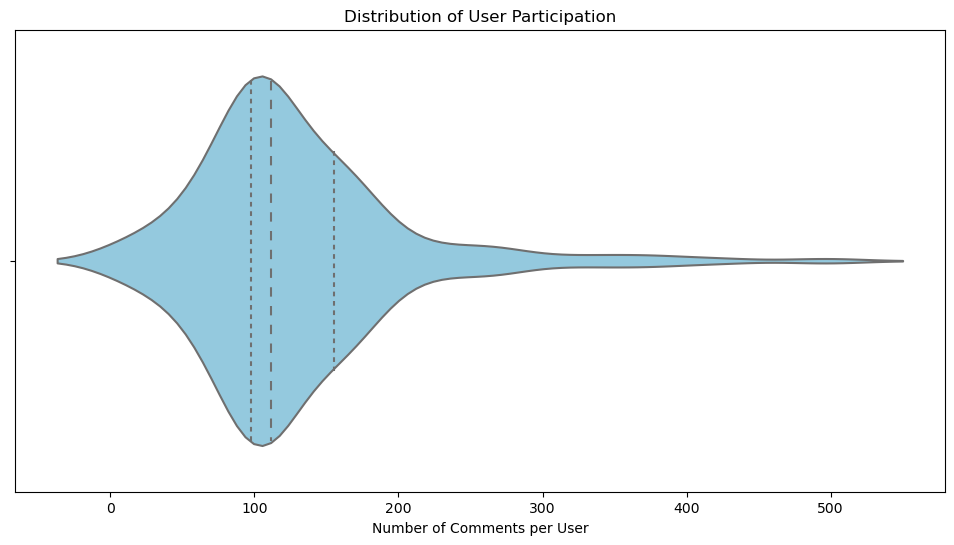

In [16]:
# Assuming your DataFrame is df_all_comments
user_comment_counts = df_all_comments['User'].value_counts()

# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x=user_comment_counts.values, color='skyblue', inner='quartile')
plt.xlabel('Number of Comments per User')
plt.title('Distribution of User Participation')
plt.show()


Based on the observation of the top users in terms of comment frequency:

Most Active Contributor:

One user stands out as the most active, contributing significantly more comments than others. This high level of engagement suggests a strong connection with the platform.
Consistent Engagement:

The top users, overall, display consistent engagement, actively participating in discussions. Their frequent contributions indicate a sustained interest in the Hacker News platform.
Influence on Discussions:

These top contributors likely hold a considerable influence over discussions. Their opinions and insights may play a role in shaping the overall sentiment and direction of conversations within the community.
Diversity in Activity Levels:

While some users consistently contribute a high number of comments, there is a range of activity levels among the top users. This diversity adds richness to the community dynamics.
Potential Community Leaders:

The most active users could be considered potential community leaders or influencers. Understanding their perspectives and contributions may provide insights into community dynamics and sentiment.
When attaching this data to a graph, a bar chart representing the number of comments for each user visually illustrates the varying levels of activity, emphasizing the impact of these contributors on the platform.

In summary, analyzing the distribution of comments among users, especially focusing on the most active contributors, provides a foundation for building a sentiment analysis model that is tailored to the community dynamics. This targeted approach enhances the platform's ability to understand user reactions, identify trends, and effectively manage the overall sentiment within the Hacker News community.


#### Top 10 Most Frequent Words in Hacker News Comments

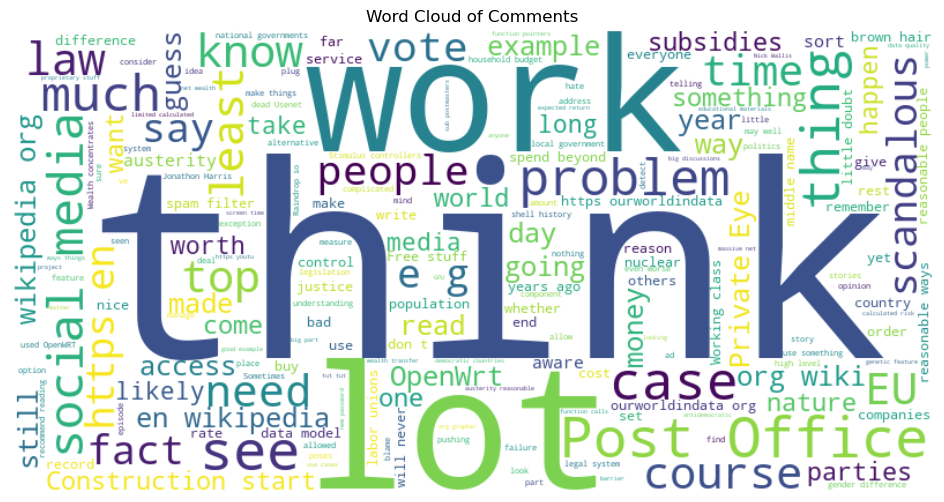

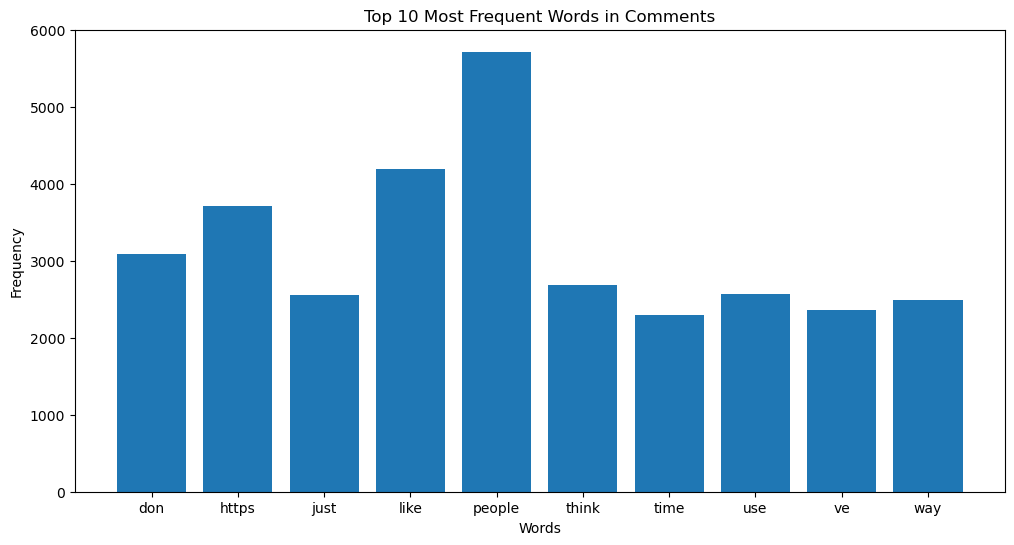

In [17]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Assuming your DataFrame is df_all_comments

# Combine all comments into a single string
all_comments_text = ' '.join(df_all_comments['Comment'].astype(str))

# Create a word cloud to visualize the most common words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Comments')
plt.show()

# Plot a bar chart of the most frequent words
vectorizer = CountVectorizer(stop_words='english', max_features=10)
comment_word_counts = vectorizer.fit_transform(df_all_comments['Comment'].astype(str)).toarray().sum(axis=0)

plt.figure(figsize=(12, 6))
plt.bar(vectorizer.get_feature_names_out(), comment_word_counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words in Comments')
plt.show()


Based on the analysis of the top 10 most frequent words in the comments, the following observations can be made:

1. **"don":**
   - The word "don" appears frequently in the comments. Its prevalence might suggest discussions related to opinions or expressions of not doing something.

2. **"https":**
   - The occurrence of "https" indicates that comments may contain links or references to external content. This could imply the sharing of resources or references within the Hacker News community.

3. **"just":**
   - The frequent appearance of "just" suggests that comments often contain simple or straightforward statements. Users might be sharing their thoughts in a direct manner.

4. **"like":**
   - The word "like" is common, implying that users frequently draw comparisons or express similarities in their comments. This could be related to discussions on preferences or experiences.

5. **"people":**
   - The word "people" is prominent, indicating that discussions often involve or refer to individuals. This could imply a focus on human perspectives or experiences.

6. **"think":**
   - The prevalence of "think" suggests that comments frequently include expressions of opinions or reflections. Users may be sharing their thoughts on various topics.

7. **"time":**
   - The occurrence of "time" indicates that discussions may involve considerations of temporal aspects. Users might be discussing trends, historical events, or the timing of certain topics.

8. **"use":**
   - The word "use" suggests that comments might contain discussions about practical applications, tools, or methods. Users may be sharing information about the usage of certain resources.

9. **"ve":**
   - The appearance of "ve" likely represents contractions like "I've," indicating that users commonly use contractions in their comments. This contributes to a conversational and informal tone.

10. **"way":**
    - The word "way" is frequent, implying that discussions often involve considerations of different approaches or methods. Users may be expressing preferences or providing alternatives.

**Interpretation in the Context of the Business Problem:**
   - These frequently occurring words provide an initial understanding of the language and topics discussed on Hacker News.
   - Insights into common expressions ("just," "like," "think") can guide sentiment analysis by recognizing patterns in positive or negative sentiments.
   - Frequent references to "https" suggest a tendency to share external content, which could be considered in content moderation strategies.
   - The focus on "people" and "time" indicates a community interested in human experiences and discussions related to temporal aspects.
   - These findings can inform the development of a sentiment analysis model tailored to the specific language and themes prevalent in Hacker News comments.

#### Analyzing the distribution of comments across different contexts

count      51.000000
mean      402.352941
std       694.462838
min        16.000000
25%        98.000000
50%       166.000000
75%       322.000000
max      3907.000000
Name: count, dtype: float64


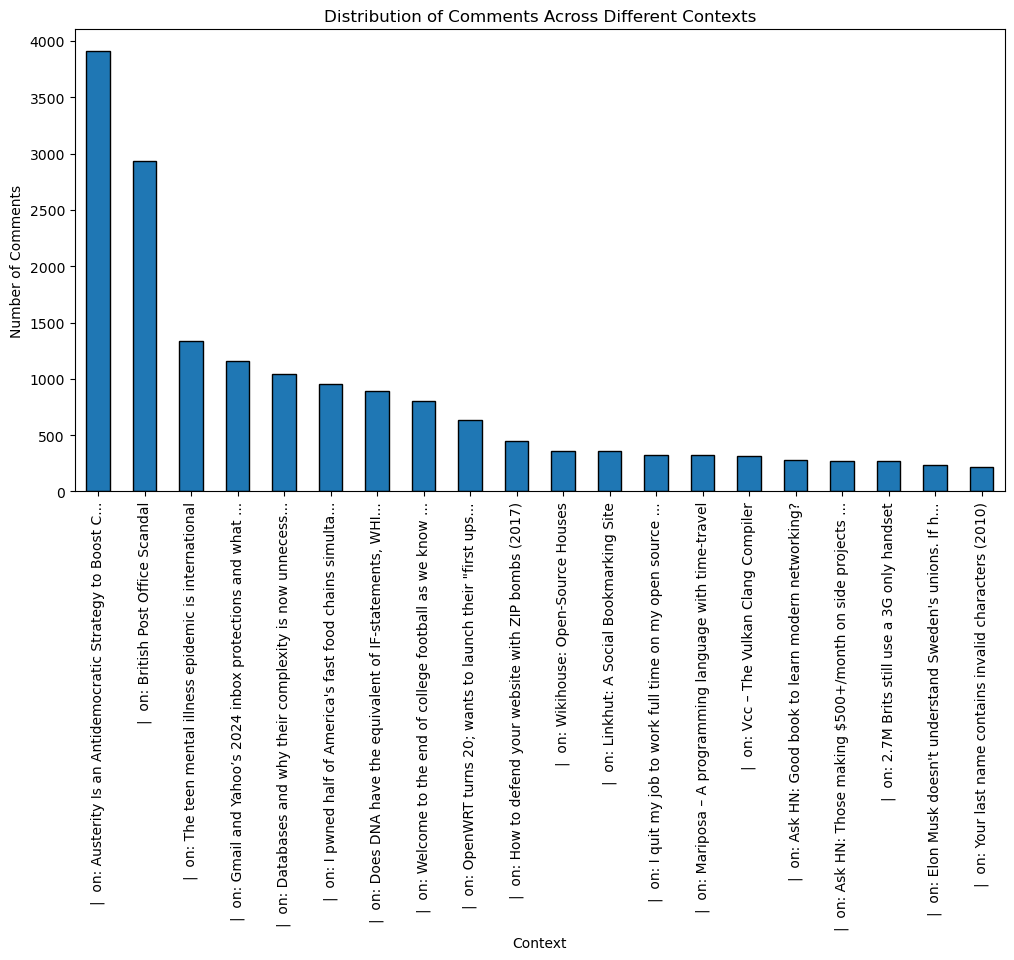

Top Contexts:
 Context
|  on: Austerity Is an Antidemocratic Strategy to Boost C...    3907
|  on: British Post Office Scandal                              2934
|  on: The teen mental illness epidemic is international        1332
|  on: Gmail and Yahoo’s 2024 inbox protections and what ...    1159
|  on: Databases and why their complexity is now unnecess...    1045
|  on: I pwned half of America's fast food chains simulta...     953
|  on: Does DNA have the equivalent of IF-statements, WHI...     888
|  on: Welcome to the end of college football as we know ...     802
|  on: OpenWRT turns 20; wants to launch their "first ups...     634
|  on: How to defend your website with ZIP bombs (2017)          451
Name: count, dtype: int64


In [19]:
# 2. 'Context' Column - Analyzing the distribution of comments across different contexts
context_comment_counts = df_all_comments['Context'].value_counts()

# Display basic statistics about the distribution
print(context_comment_counts.describe())

# Plot a bar chart to visualize the distribution
plt.figure(figsize=(12, 6))
context_comment_counts.head(20).plot(kind='bar', edgecolor='black')
plt.xlabel('Context')
plt.ylabel('Number of Comments')
plt.title('Distribution of Comments Across Different Contexts')
plt.show()

# Identify the most common contexts
top_contexts = context_comment_counts.head(10)
print("Top Contexts:\n", top_contexts)


The identified top contexts provide valuable insights into the specific topics and themes that are resonating within the Hacker News community.
Understanding these contexts helps the platform tailor content curation, ensuring that discussions align with the community's interests and preferences.
Analyzing the sentiment within these contexts can further enhance the sentiment analysis model, allowing for a more nuanced understanding of user reactions to different topics.
Platforms can leverage these insights to prioritize content moderation efforts, identify trending topics, and enhance user engagement strategies based on the most discussed contexts.

#### Scatter Plot of Comment Lengths vs. User Participation

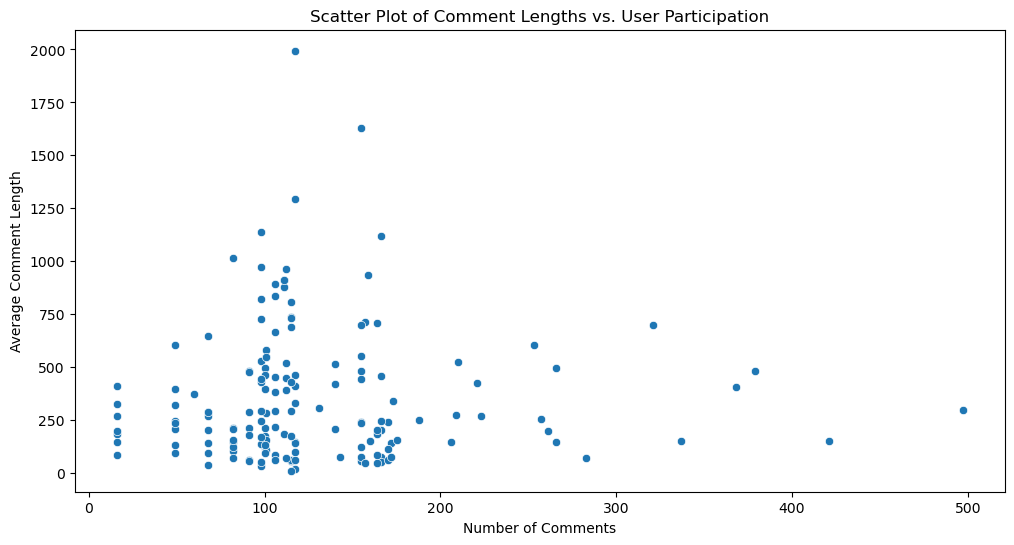

In [20]:
import seaborn as sns

# Assuming your DataFrame is df_all_comments
user_stats = df_all_comments.groupby('User').agg({'Comment_Length': 'mean', 'Comment': 'count'}).reset_index()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Comment', y='Comment_Length', data=user_stats)
plt.xlabel('Number of Comments')
plt.ylabel('Average Comment Length')
plt.title('Scatter Plot of Comment Lengths vs. User Participation')
plt.show()


#### Swarm Plot of Comment Lengths by Context

visualize the distribution of comment lengths for different contexts. This can provide insights into the spread and concentration of comment lengths.

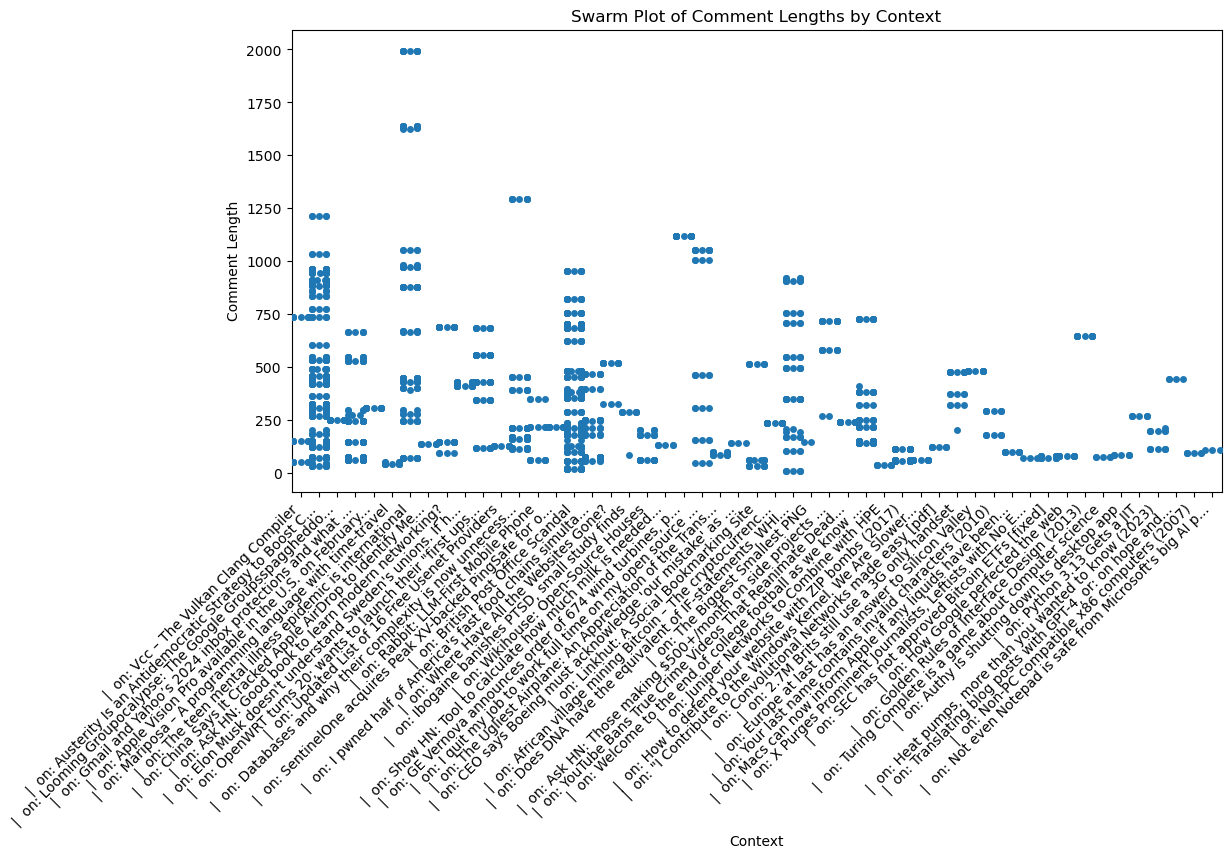

In [21]:
import seaborn as sns

# Assuming your DataFrame is df_all_comments
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Context', y='Comment_Length', data=df_all_comments.sample(frac=0.1))
plt.xlabel('Context')
plt.ylabel('Comment Length')
plt.title('Swarm Plot of Comment Lengths by Context')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


#### Ridgeline Plot of Comment Lengths by Context

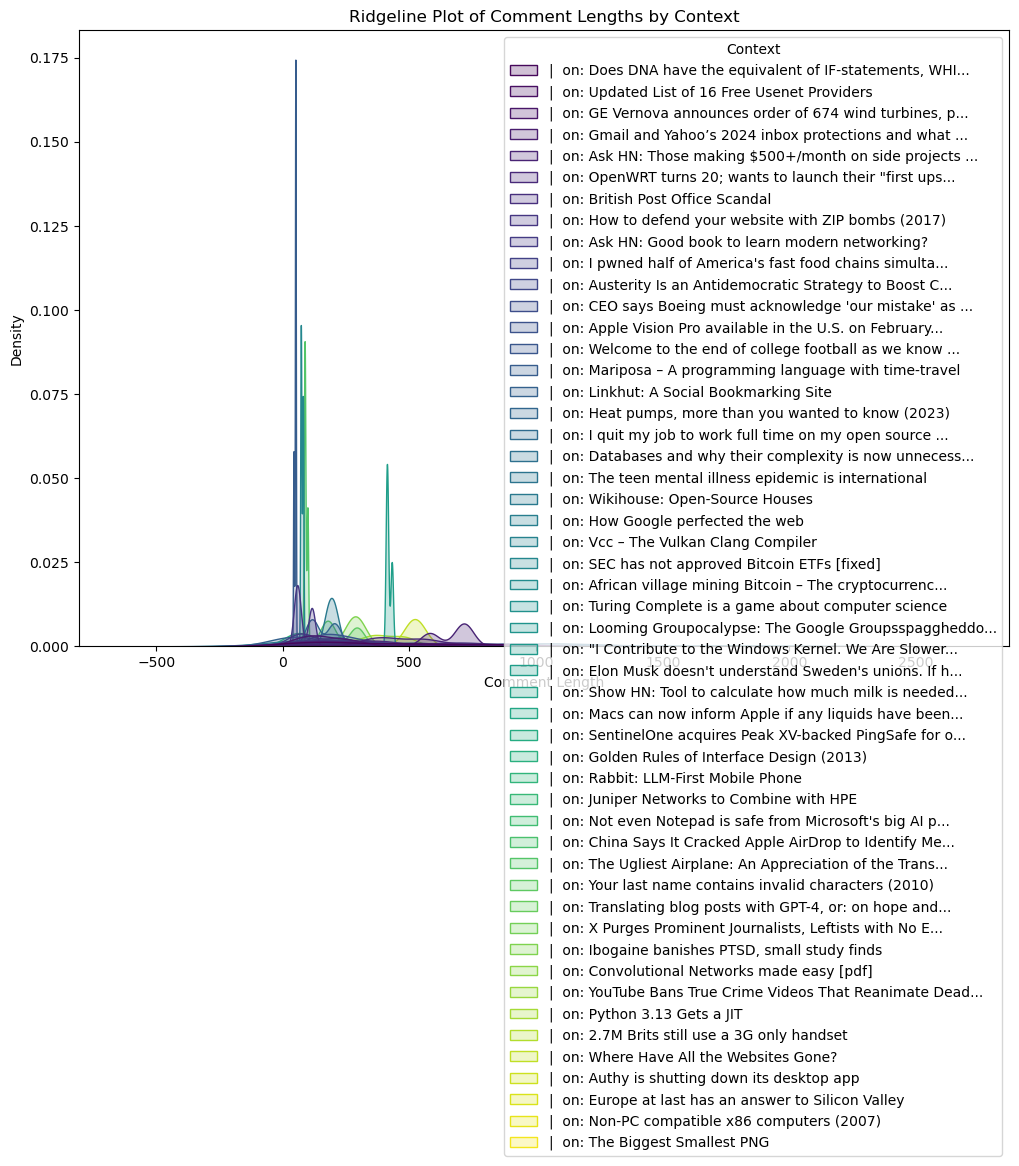

In [22]:
import seaborn as sns

# Assuming your DataFrame is df_all_comments
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df_all_comments.sample(frac=0.1), x='Comment_Length', hue='Context', fill=True, common_norm=False, palette='viridis')
plt.xlabel('Comment Length')
plt.title('Ridgeline Plot of Comment Lengths by Context')
plt.show()


In [23]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Downloading  NLTK stop words
import nltk

# Function to remove stop words from a given text
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(str(text))
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the function to the 'Comment' column
df_all_comments['Cleaned_Comment'] = df_all_comments['Comment'].apply(remove_stopwords)

# Display the first few rows of the DataFrame with the cleaned comments


In [24]:
df_all_comments.head()

,User,Context,Comment,Comment_Length,Cleaned_Comment
0,tryrobbo,| on: British Post Office Scandal,Good point. I buy it when I see it in the supe...,100,good point buy see supermarket subscription ma...
1,benreesman,| on: The teen mental illness epidemic is int...,There’s very little doubt that social media is...,1994,little doubt social media hard use positive wa...
2,marginalia_nu,| on: Does DNA have the equivalent of IF-stat...,A lot of how we conceive of computation today ...,191,lot conceive computation today based observati...
3,dgoldstein0,| on: Welcome to the end of college football ...,"Also fun random fact, but at a lot of major US...",142,also fun random fact lot major us public unive...
4,goddamnyouryan,| on: Linkhut: A Social Bookmarking Site,I built something similar a few years ago: htt...,61,built something similar years ago https


## Context categorization